<h1 style="text-align: center"> 3.4.1 Измерение Магнитной Восприимчивости Диа- и Парамагнетиков</h1>
<h3 style="text-align: right; "> Хорев Михаил, Б03-101</h3>

------

### 1. Введение
**В работе используются**: электромагнит, весы, милливеберметр, регулируемый источник постоянного тока, образцы диа- и парамагнетиков

### 2. Теория
Для определения магнитной восприимчивости тел воспользуемся методом Гюи. Для этого будем измерять силу, действующую на тонкий и длинный стержень, один из концов которого помещен в зазор электромагнита, а другой - вне зазора, где величиной магнитного поля можно пренебречь.
Найдем силу, действующую на образец в магнитном поле, из энергетических соображений.
$$F = (\frac{\Delta W_{m}}{\Delta l})_{I} $$
Здесь $ \Delta W_{m} $ - изменение магнитной энергии системы при постоянном токе в обмотке электромагнита и, следовательно, при постоянной величине магнитного поля в зазоре.

Магнитная энергия рассчитывается по формуле $$ W_{m} = \frac{1}{2} \int HB\mathrm{d}V = \frac{1}{2\mu_{0}} \int \frac{B^2}{\mu}\mathrm{d}V $$
При смещении образца магнитная энергия меняется только в области зазора (площадь $s$ и высота $\Delta l$), а около верхнего конца стержня остается неизменной, так как магнитного поля там нет. Принимая поле внутри стержня равным измеренному нами полю в зазоре $B$, получим:
$$ \Delta W_{m} = \frac{1}{2\mu_{0}} \frac{B^2}{\mu}s\Delta l - \frac{1}{2\mu_{0}}B^2 s \Delta l = - \frac{\chi}{2\mu_{0} \mu} B^2 s \Delta l $$
Следовательно, на образец действует сила $$ F = - \frac{\chi}{2\mu_{0} \mu}B^2 s $$

Знак силы зависит от знака $\chi$ - образцы из парамагнетика $(\chi > 0)$ втягиваются в зазор электромагнита, а диамагнетики $(\chi < 0)$ - вытягиваются из него.

Итак, принимая $\mu \approx 1 $, получаем окончательную формулу: $$ F = - \frac{\chi B^2 s}{2\mu_{0}} $$

### 3. Экспериментальная установка

<p><img src="341_plant.png" align="right" width="350" style="border: 8px solid #ffffff;"/></p>
<br>
<tt>
    В зазоре электромагнита, питаемого постоянным током, создается магнитное поле. Поле внутри зазора однородно, так как диаметр полюсов значительно превосходит ширину зазора. Ток, подаваемый на обмотки электромагнита, измеряется амперметром. Связь между индукцией магнитного поля $B$ в зазоре и силой тока $I$ в его обмотках определяется при помощи милливеберметра. Образцы поочередно подвешиваются к весам, и при помощи перегрузки определяется сила, действующая на образец со стороны магнитного поля $$ \Delta P = F $$
</tt>

### 4. Ход работы
<p style="text-align:center; font-size: 16px">Начальные данные:</p>

$$ SN = 72 см^2 $$ $$ r_{внешн} \leq 5  Ом $$ $$ I_{max} = 3.02 А $$

#### 4.1 Градуировка Электромагнита
| №   | $\Phi, мВб$ | $I, А$ |
|:---:|:-----------:|:------:|
| $1$ | $0.50$      | $0.20$ |
| $2$ | $1.35$      | $0.61$ |
| $3$ | $2.25$      | $1.00$ |
| $4$ | $3.05$      | $1.36$ |
| $5$ | $4.00$      | $1.80$ |
| $6$ | $4.80$      | $2.20$ |
| $7$ | $5.55$      | $2.60$ |
| $8$ | $6.15$      | $3.01$ |

<p style="text-align:center; font-size:10px;"> <em> Табл. 1 Результаты измерения потока $\Phi$ в зависимости от тока внутри катушки $I$ </em> </p>

Воспользуемся формулой $ \Phi = B(SN) $ и построим график зависимости $ B = \frac{\Phi}{SN} $ от тока в катушке $I$.
Также примем систематические погрешности измерения $I$ и $\Phi$ равными: $$ \sigma_{I}^{сист} = \pm0.05 А $$  $$ \sigma_{\Phi}^{сист} = \pm0.05 мВб $$ $$ \sigma_{B}^{сист} = \frac{\sigma_{\Phi}^{сист}}{\Phi} B = \frac{\sigma_{\Phi}^{сист}}{SN} \approx \pm 7 мТл$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def mnk_error(x_arr, y_arr, k):
    arr_len = len(x_arr)
    if arr_len != len(y_arr):
        raise ValueError("Длины массивов не совпадают")
        return
    Dyy = sum([y**2 for y in y_arr])/arr_len - (sum(y_arr)/arr_len)**2
    Dxx = sum([x**2 for x in x_arr])/arr_len - (sum(x_arr)/arr_len)**2
    k_err = (  1/(arr_len-2) * (Dyy/Dxx - k**2)  ) ** (1/2)
    return k_err, k_err*sum([x**2 for x in x_arr])/arr_len

SN = 72 * (10**-4) # м^2
I = np.array([0.20, 0.61, 1.00, 1.36, 1.80, 2.20, 2.70, 3.01]) # А
Phi = np.array([0.50, 1.35, 2.25, 3.05, 4.00, 4.80, 5.55, 6.15]) # мВб
B = Phi / SN # мТл
m, c = np.polyfit(I, B, 1) # мТл(А)

print(m)

280.8031791676651


Случайную погрешность МНК найдем по формуле: $$ \sigma_{k} = \sqrt{ \frac{1}{n-1}( \frac{\langle y^2 \rangle}{\langle x^2 \rangle} - k^2 ) } $$ $$ \sigma_{b} = \sigma_{k} \sqrt{\langle x^2 \rangle} $$

Коэффициент наклона прямой k = 280.8031791676651 мТл/А
Константа b = 27.941603762281236 мТл
2.5149342680770888 %


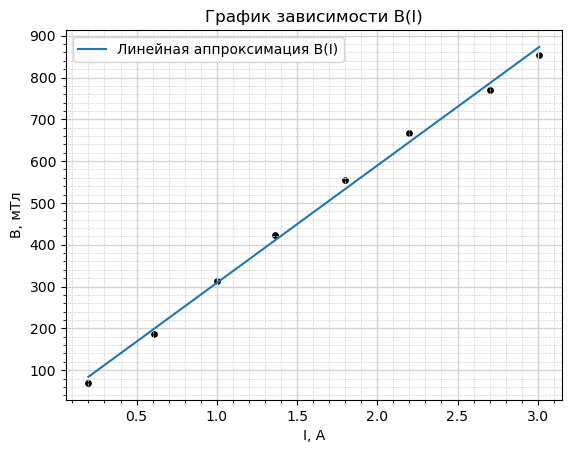

In [10]:
fig, ax = plt.subplots()
ax.set_title("График зависимости B(I)")
ax.set_xlabel("I, А")
ax.set_ylabel("B, мТл")

plt.minorticks_on()
plt.grid(which='major', color='lightgrey', linestyle='-', linewidth=1)
plt.grid(which='minor', color='lightgrey', linestyle='--', linewidth=0.5)

plt.scatter(I, B, c='black', s=15)
plt.plot(I, I*m + c, label="Линейная аппроксимация B(I)")
ax.legend()
print(f"Коэффициент наклона прямой k = {m} мТл/А")
print(f"Константа b = {c} мТл")

# Погрешности
k_mnk_err, _ = mnk_error(I, B, m)
print(k_mnk_err/m * 100, '%')

### 4.2 Измерение сил и обработка результатов
Подвесим к весам образец так, чтобы один его конец находился внутри зазора электромагнита $(I = 0)$  и стержень не касался наконечников магнита. Когда образец перестанет колебаться, обнулим весы и включим электромагнит. Полученное значение $\Delta P$ запишем в таблицу: 

<table class="iksweb">
	<tbody>
		<tr>
			<th colspan="2"></th>
			<th colspan="2">Al
m, мг</th>
			<th colspan="2">Cu
m, мг</th>
			<th colspan="2">Графит
m, мг</th>
		</tr>
		<tr>
			<td>№</td>
			<td>I, А</td>
			<td>↓</td>
			<td>↑</td>
			<td>↓</td>
			<td>↑</td>
			<td>↓</td>
			<td>↑</td>
		</tr>
		<tr>
			<td>1</td>
			<td>0.20</td>
			<td>0</td>
			<td>0</td>
			<td>0</td>
			<td>0</td>
			<td>7</td>
			<td>11</td>
		</tr>
		<tr>
			<td>2</td>
			<td>0.61</td>
			<td>3</td>
			<td>3</td>
			<td>-1</td>
			<td>-1</td>
			<td>36</td>
			<td>43</td>
		</tr>
		<tr>
			<td>3</td>
			<td>1.00</td>
			<td>7</td>
			<td>8</td>
			<td>-2</td>
			<td>-3</td>
			<td>72</td>
			<td>80</td>
		</tr>
		<tr>
			<td>4</td>
			<td>1.36</td>
			<td>12</td>
			<td>13</td>
			<td>-5</td>
			<td>-5</td>
			<td>107</td>
			<td>114</td>
		</tr>
		<tr>
			<td>5</td>
			<td>1.80</td>
			<td>20</td>
			<td>22</td>
			<td>-9</td>
			<td>-9</td>
			<td>146</td>
			<td>153</td>
		</tr>
		<tr>
			<td>6</td>
			<td>2.20</td>
			<td>29</td>
			<td>31</td>
			<td>-13</td>
			<td>-13</td>
			<td>179</td>
			<td>186</td>
		</tr>
		<tr>
			<td>7</td>
			<td>2.60</td>
			<td>40</td>
			<td>40</td>
			<td>-17</td>
			<td>-18</td>
			<td>210</td>
			<td>216</td>
		</tr>
		<tr>
			<td>8</td>
			<td>3.01</td>
			<td>48</td>
			<td>48</td>
			<td>-21</td>
			<td>-21</td>
			<td>233</td>
			<td>233</td>
		</tr>
	</tbody>
</table>
<p style="text-align:center; font-size:10px;"> <em> Табл. 2 Результаты измерений зависимости $ \Delta P (I) $ </em> </p>

Здесь $m$: $$ \Delta P = g\times m $$

In [4]:
g = 9.81 # м/c^2
# Алюминий
p_Al_f = np.array([0, 3, 7, 12, 20, 29, 40, 48]) * g * 10**-3
p_Al_b = np.array([0, 3, 8, 13, 22, 31, 40, 48]) * g * 10**-3

# Медь
p_Cu_f = np.array([0, -1, -2, -5, -9, -13, -17, -21]) * g * 10**-3
p_Cu_b = np.array([0, -1, -3, -5, -9, -13, -18, -21]) * g * 10**-3

# Графит
p_G_f = np.array([7, 36, 72, 107, 146, 179, 210, 233]) * g * 10**-3
p_G_b = np.array([11, 43, 80, 114, 153, 186, 216, 233]) * g * 10**-3

Для того, чтобы найти зависимость $\Delta P(B^2)$, переведем $I\rightarrow B$ по градуировочной кривой, полученной в **4.1** 

Коэффициент наклона k = 622.2039742824287 мН/(Тл)^2


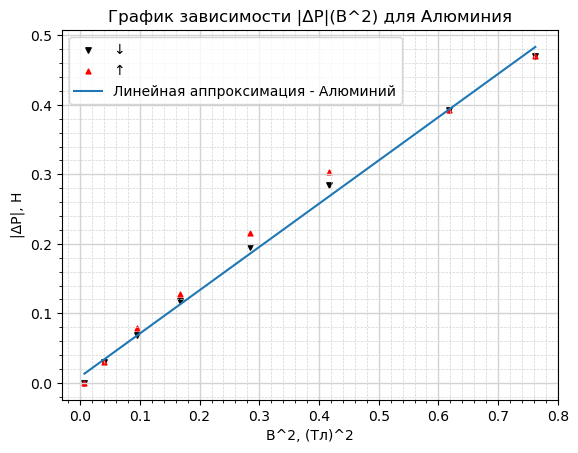

In [5]:
# I не изменился, поэтому:
B = (m*I + c) * 10**-3 # Тл
sq_B = B**2
m_al, c_al = np.polyfit(sq_B, abs(p_Al_f), 1)
m_cu, c_cu = np.polyfit(sq_B, abs(p_Cu_f), 1)
m_g, c_g = np.polyfit(sq_B, abs(p_G_f), 1)


fig, ax = plt.subplots()
ax.set_title("График зависимости |ΔP|(B^2) для Алюминия")
ax.set_xlabel("B^2, (Тл)^2")
ax.set_ylabel("|ΔP|, Н")

plt.minorticks_on()
plt.grid(which='major', color='lightgrey', linestyle='-', linewidth=1)
plt.grid(which='minor', color='lightgrey', linestyle='--', linewidth=0.5)

plt.scatter(sq_B, p_Al_f, c='black', s=15, marker='v', label='↓')
plt.scatter(sq_B, p_Al_b, c='red', s=12, marker='^', label='↑')
plt.plot(sq_B, m_al*sq_B + c_al, label="Линейная аппроксимация - Алюминий")
ax.legend()
print(f"Коэффициент наклона k = {m_al * 10**3} мН/(Тл)^2")

Коэффициент наклона k = 275.90701496674546 мН/(Тл)^2


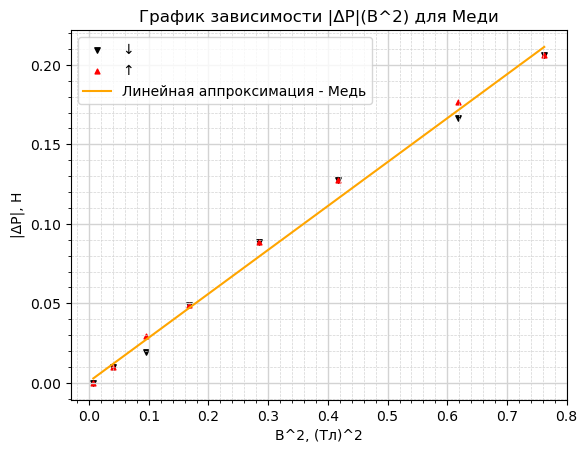

In [6]:
fig, ax = plt.subplots()
ax.set_title("График зависимости |ΔP|(B^2) для Меди")
ax.set_xlabel("B^2, (Тл)^2")
ax.set_ylabel("|ΔP|, Н")

plt.minorticks_on()
plt.grid(which='major', color='lightgrey', linestyle='-', linewidth=1)
plt.grid(which='minor', color='lightgrey', linestyle='--', linewidth=0.5)

plt.scatter(sq_B, abs(p_Cu_f), c='black', s=15, marker='v', label='↓')
plt.scatter(sq_B, abs(p_Cu_b), c='red', s=12, marker='^', label='↑')
plt.plot(sq_B, m_cu*sq_B + c_cu, label="Линейная аппроксимация - Медь", c='orange')
ax.legend()
print(f"Коэффициент наклона k = {m_cu * 10**3} мН/(Тл)^2")

Коэффициент наклона k = 2787.0222108907087 мН/(Тл)^2


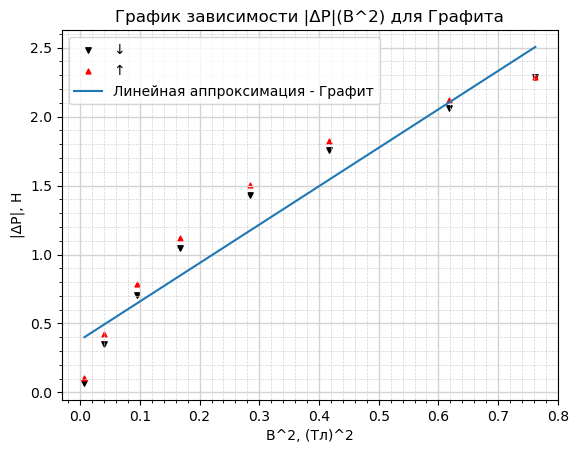

In [7]:
fig, ax = plt.subplots()
ax.set_title("График зависимости |ΔP|(B^2) для Графита")
ax.set_xlabel("B^2, (Тл)^2")
ax.set_ylabel("|ΔP|, Н")

plt.minorticks_on()
plt.grid(which='major', color='lightgrey', linestyle='-', linewidth=1)
plt.grid(which='minor', color='lightgrey', linestyle='--', linewidth=0.5)

plt.scatter(sq_B, p_G_f, c='black', s=15, marker='v', label='↓')
plt.scatter(sq_B, p_G_b, c='red', s=12, marker='^', label='↑')

#
tmp_k, tmp_c = np.polyfit(sq_B, np.log(p_G_f),)
#
plt.plot(sq_B, m_g*sq_B + c_g, label="Линейная аппроксимация - Графит")
ax.legend()
print(f"Коэффициент наклона k = {m_g * 10**3} мН/(Тл)^2")

Полученные данные запишем в таблицу:

Теперь для каждого материала найдем коэффициент $\chi$ как: $$ \chi = \frac{2\mu_0 k}{s} $$

In [11]:
s = 1/4 * 10**-6
mu0 = 4*3.14*10**-7
cons = 2 * mu0 / s

chi_al = cons * m_al 
chi_cu = cons * m_cu
chi_g = cons * m_g

print(f"Для Алюминия: {chi_al}")
print(f"Для Меди: {chi_cu}")
print(f"Для Графита: {chi_g}")


Для Алюминия: 6.251905533589843
Для Меди: 2.7723136863858584
Для Графита: 28.003999175029843


## Вывод